In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

In [36]:
def get_data():
    data = load_svmlight_file("australian_scale")
    return data[0], data[1]

#Import data
X, y = get_data()

In [46]:
#Divide dataset into training set and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train = X_train.todense()
y_train = y_train.reshape(y_train.shape[0],1)
X_test = X_test.todense()
y_test = y_test.reshape(y_test.shape[0],1)

## SVM

$LossFunction =\frac{||w||^2}{2}+\frac{C}{m}\sum_{i=1}^mmax(0,1-y_i(W^Tx_i +b) $

$G_W =W+\frac{C}{m}\sum_{i=1}^m-y_i*x_i  $  ,if $1-y_i(W^Tx_i +b) >0$

$G_b =\frac{C}{m}\sum_{i=1}^m-y_i  $  ,if $1-y_i(W^Tx_i +b) >0$

In [56]:
print(y_train)

[[-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]

In [59]:
j=2
print(y_train[j])
y_train[j]*(X_train[j].dot(W)+b)

[ 1.]


matrix([[-1.242241]])

In [63]:
def SVM(threshold,delta,n,X_train,y_train,X_test,y_test):

    #Initialize linear model parameters. Set all parameter into one
    W = np.ones((X.shape[1],1))
    b = 1
    C = 10

    trainCost = []
    validationCost = []
    accuracy = []
    for i in range(n):
        tc = 0
        vc = 0        
        GW = 0
        Gb = 0
        accurateCnt = 0
        for j in range(X_train.shape[0]):
            if (1-y_train[j]*(X_train[j].dot(W)+b)) > 0 :
                tc += C*(1-y_train[j]*(X_train[j].dot(W)+b))
                Gb += C*-1*y_train[j]
                GW += C*-1*y_train[j]*X_train[j]

        for j in range(X_test.shape[0]):
            if (X_test[j].dot(W)+b >= threshold) and y_test[j] == 1 :
                accurateCnt +=1
            if (X_test[j].dot(W)+b < threshold) and y_test[j] == -1 :
                accurateCnt +=1
            if (1-y_test[j]*(X_test[j].dot(W)+b)) > 0 :
                vc += C*(1-y_test[j]*(X_test[j].dot(W)+b))
                    
        trainCost.append(np.sum(tc/X_train.shape[0] + 0.5*np.sum(W.T.dot(W))))
        validationCost.append(np.sum(vc/X_test.shape[0] + 0.5*np.sum(W.T.dot(W))))
        accuracy.append(accurateCnt/X_test.shape[0])
        GW = GW.T/X_train.shape[0] + W
        Gb = Gb/X_train.shape[0]
        DW = -GW
        Db = -Gb

        W = W + delta*DW
        b = b + delta*Db
    return trainCost,validationCost,accuracy

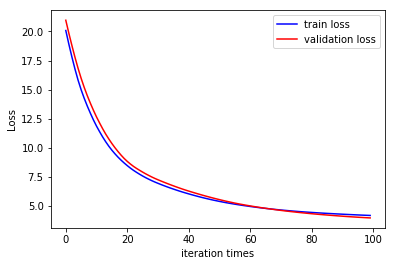

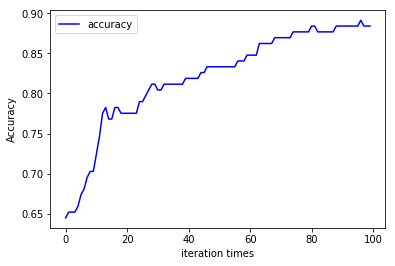

In [67]:
n = 100       #iteration time
delta = 0.01 # learning rate
threshold = 0 # classfication threshold
t,v,a = SVM(threshold,delta,n,X_train,y_train,X_test,y_test)

plt.figure(1)
x = np.arange(0, n, 1)
plt.xlabel('iteration times')
plt.ylabel('Loss')
plt.plot(x,t,color="b",label = "train loss")
plt.plot(x,v,color="r",label = "validation loss")
plt.legend(loc='upper right')
plt.show()

plt.figure(2)
x = np.arange(0, n, 1)
plt.xlabel('iteration times')
plt.ylabel('Accuracy')
plt.plot(x,a,color="b",label = "accuracy")
plt.legend(loc='upper left')
plt.show()